<a href="https://colab.research.google.com/github/samezqui/fullofstars/blob/star_move/Update_FullofStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install skyfield

from skyfield.api import Star, load
from skyfield.data import hipparcos



     |████████████████████████████████| 215kB 4.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/8e/9e/57/2abcf750273b685ca923f7e3d7034ec4f91ef2ebfac616437b
  Stored in directory: /root/.cache/pip/wheels/13/d3/06/3799163edac5d1f454832143f7730413dcc56f42acfbb9f0d3
  Stored in directory: /root/.cache/pip/wheels/6d/e2/42/5dc20daf2ba62ae03dc8abe10744ee67d9452df447dac561db
Successfully built skyfield jplephem sgp4


        magnitude  ra_degrees  dec_degrees  parallax_mas  ra_mas_per_year  \
hip                                                                         
1            9.10    0.000912     1.089013          3.54            -5.20   
2            9.27    0.003797   -19.498837         21.90           181.21   
3            6.61    0.005008    38.859286          2.81             5.24   
4            8.06    0.008382   -51.893546          7.75            62.85   
5            8.55    0.009965   -40.591224          2.87             2.53   
6           12.31    0.018141     3.946489         18.80           226.29   
7            9.64    0.022549    20.036602         17.74          -208.12   
8            9.05    0.027292    25.886474          5.17            19.09   
9            8.59    0.035342    36.585938          4.81            -6.30   
10           8.59    0.036253   -50.867074         10.76            42.23   
11           7.34    0.037297    46.940002          4.29            11.09   

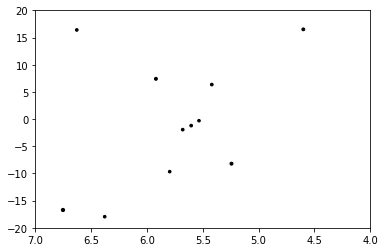

In [18]:
# you need to load everytime you filter!!

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f) 
print(df)
# hipparcos only provides stars based on #ID, its magnitude and location 
# in dec and ra 
    
df = df[df['magnitude'] <= 2.5] # Bigger number = more stars 
print('After filtering, there are {} stars'.format(len(df)))

bright_stars = Star.from_dataframe(df)
planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.now()
  # ts.utc(2018, 9, 3)
  # time doesn't matter??? 
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

print('There are {} right ascensions'.format(len(ra.hours)))
print('and {} declinations'.format(len(dec.degrees)))

from matplotlib import pyplot as plt
plt.scatter(ra.hours, dec.degrees, 9 - df['magnitude'], 'k')
plt.xlim(7, 4)
plt.ylim(-20, 20)
# plt.savefig('bright_stars.png')
print(' ')
print('Super cool but not what I need. Not relative positions from earth ')

# Generating Positions of Stars

The zenith is the point exactly overheard when you look up from the ground. Which is 90 degs from the horizon. 90degs Altitude

https://physics.weber.edu/schroeder/ua/StarMotion.html 

In [7]:
from skyfield.positionlib import ICRF

x = 3141.0
y = 2718.0
z = 5820.0
vec = ICRF([x, y, z]) 

from skyfield.api import Star, Topos, load

ts = load.timescale()
t = ts.now()
# tying in time
# https://rhodesmill.org/skyfield/time.html 

planets = load('de421.bsp')
mars = planets['mars']
barnard = Star(ra_hours=(17, 57, 48.49803),
               dec_degrees=(4, 41, 36.2072))
# defined stars


# From the center of the Earth (Geocentric)

earth = planets['earth']
astrometric = earth.at(t).observe(barnard)
apparent = earth.at(t).observe(barnard).apparent()
  # can replace mars with barnard
  
 
# From a place on Earth (Topocentric)

Notre_Dame = earth + Topos('41.7001 N', '86.2379 W') # South Quad coordinates 
astrometric = Notre_Dame.at(t).observe(barnard)
apparent = Notre_Dame.at(t).observe(barnard).apparent()
  # can replace Mars with barnard
  # can replace barnard with Mars 
  
  
# Altitude and azimuth in the sky of a
# specific geographic location


astro = Notre_Dame.at(ts.utc(2009, 8, 1)).observe(barnard)
# t = ts.utc(year, month, day) at midnight

app = astro.apparent()

alt, az, distance = app.altaz()
print(alt.dstr()) # display altitude
print(az.dstr())  # display azimuth 
print(distance)   # distance away 

print('So Barnard was more than 34° above the horizon for the Irish on 2009 Aug 1 at midnight UTC.')
# This is just a string that must be updated with every change and run

# plot this using polar coordinates



34deg 47' 36.6"
119deg 03' 16.6"
2.06265e+14 au
So Barnard was more than 34° above the horizon for the Irish on 2009 Aug 1 at midnight UTC.


# Function to Plot Sky Map

In [0]:
def plot_star():
  import matplotlib.pyplot as plt 
  ax = plt.gca(projection='polar')
  

#Weather Affects Refraction of Light from Stars
The altitude returned from a plain altaz() call is the ideal position that you would observe if the Earth had no atmosphere. You can also ask Skyfield to estimate where an object might actually appear in the sky after the Earth’s atmosphere has refracted its image higher. If you know the weather conditions, you can specify them.

In [5]:
alt, az, distance = app.altaz(temperature_C=15.0,
                              pressure_mbar=1005.0)
# or use standard for rough simulation 
# alt, az, distance = app.altaz('standard')
print(alt.dstr())

24deg 32' 34.1"


#Figuring out how to plot

We're gonna use Astropy


In [17]:
!pip install astropy
from astropy.time import Time
from skyfield.api import load

atime = Time('2010-01-01T00:00:00', scale='utc')
print(atime)

ts = load.timescale()
t = ts.from_astropy(atime)
print(t.utc_jpl())

# Convert Positions 
import astropy.units as u
from skyfield.api import load

planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.utc(1980, 1, 1)
apparent = earth.at(t)

print(apparent.position.to(u.au))
print(apparent.velocity.to(u.au / u.day))

ra, dec, distance = apparent.radec()
declination = dec.to(u.deg)
# what we need for skycoord 


print('{0:0.03f}'.format(declination)) 

2010-01-01T00:00:00.000
A.D. 2010-Jan-01 00:00:00.0000 UT
[-0.16287311  0.88787399  0.38473904] AU
[-0.01721258 -0.00279426 -0.0012121 ] AU / d
23.084 deg


https://astroplan.readthedocs.io/en/latest/_modules/astroplan/plots/sky.html#plot_sky 